In [1]:
from google.colab import files
files.upload()

Saving mobile_price.csv to mobile_price.csv


{'mobile_price.csv': b'battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range\n842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1\n1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2\n563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2\n615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2\n1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1\n1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1\n1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3\n1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0\n1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0\n509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0\n769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0,3\n1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,13,1,1,1,3\n1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1\

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('/content/mobile_price.csv')

In [4]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.three_g

0       0
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: three_g, Length: 2000, dtype: int64

In [7]:
df.isna().sum().any()

False

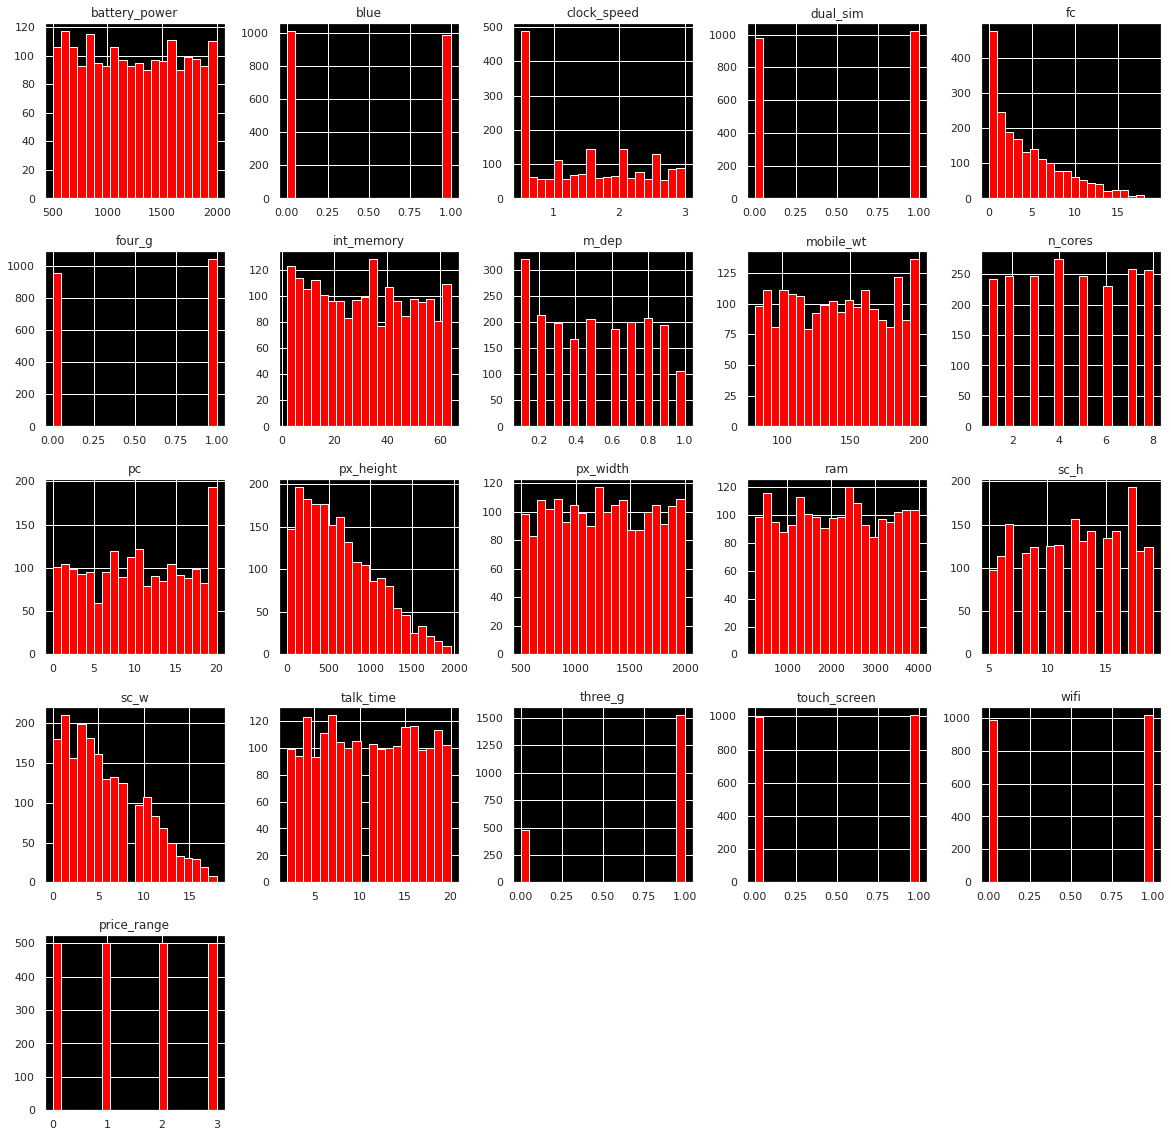

In [8]:

sns.set(rc={'axes.facecolor':'black'})

df.hist(bins=20,figsize=(20,20),color='red')
plt.show()

In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

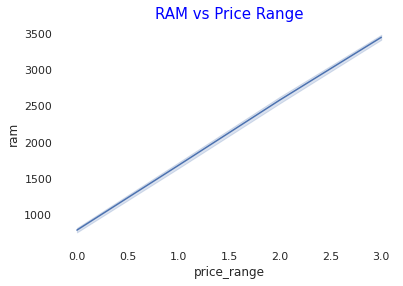

In [10]:

sns.set(rc={'axes.facecolor':'white'})
sns.lineplot(x='price_range',y='ram',data=df)
plt.title('RAM vs Price Range',color='blue',fontsize=15)
plt.show()

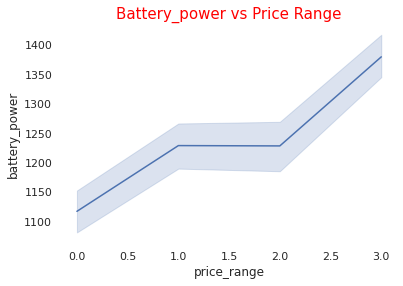

In [11]:
sns.set(rc={'axes.facecolor':'white'})
sns.lineplot(x='price_range',y='battery_power',data=df)
plt.title('Battery_power vs Price Range',color='red',fontsize=15)
plt.show()

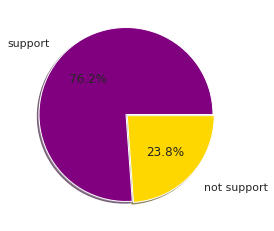

In [12]:
label=['support','not support']
values=df['three_g'].value_counts()
plt.pie(values,labels=label,autopct='%1.1f%%',colors=['purple','gold'],shadow=True,labeldistance=1.2,explode=(0.01,0.01))
plt.show()

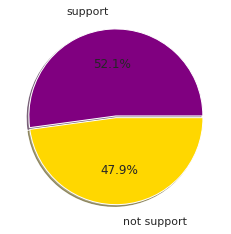

In [13]:
label=['support','not support']
values=df['four_g'].value_counts()
plt.pie(values,labels=label,autopct='%1.1f%%',colors=['purple','gold'],shadow=True,labeldistance=1.2,explode=(0.01,0.01))
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
x=df.drop('price_range',axis=1)
y=df.price_range

In [16]:
rf=RandomForestClassifier(n_estimators=1000)

In [17]:
label=x.columns
rf.fit(x,y)



RandomForestClassifier(n_estimators=1000)

In [18]:
features=pd.DataFrame(label,columns=['feature'])
score=pd.DataFrame(rf.feature_importances_,columns=['score'])

In [19]:
col=pd.concat([features,score],axis=1)

In [20]:
col.shape

(20, 2)

In [21]:
imp_feature=col.nlargest(10,'score')

In [22]:
imp_feature

,feature,score
13,ram,0.488378
0,battery_power,0.074563
11,px_height,0.057592
12,px_width,0.056736
8,mobile_wt,0.038896
6,int_memory,0.036056
16,talk_time,0.029264
10,pc,0.028719
15,sc_w,0.027417
2,clock_speed,0.026868


In [23]:
df2=[]
for col in imp_feature.feature:
  df2.append(col)

In [24]:
df2

['ram',
 'battery_power',
 'px_height',
 'px_width',
 'mobile_wt',
 'int_memory',
 'talk_time',
 'pc',
 'sc_w',
 'clock_speed']

In [25]:
x=x[df2]

In [26]:
x

,ram,battery_power,px_height,px_width,mobile_wt,int_memory,talk_time,pc,sc_w,clock_speed
0,2549,842,20,756,188,7,19,2,7,2.2
1,2631,1021,905,1988,136,53,7,6,3,0.5
2,2603,563,1263,1716,145,41,9,6,2,0.5
3,2769,615,1216,1786,131,10,11,9,8,2.5
4,1411,1821,1208,1212,141,44,15,14,2,1.2
...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1222,1890,106,2,19,14,4,0.5
1996,2032,1965,915,1965,187,39,16,3,10,2.6
1997,3057,1911,868,1632,108,36,5,3,1,0.9
1998,869,1512,336,670,145,46,19,5,10,0.9


In [27]:
x.shape

(2000, 10)

In [28]:
y=y.apply(lambda i: 1 if i>1 else 0)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [32]:
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
gnb=GaussianNB()


In [35]:
gnbmodel=gnb.fit(x_train,y_train)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
y_pred=gnbmodel.predict(x_test)

In [38]:
print('Training Accuracy', gnbmodel.score(x_train,y_train))

Training Accuracy 0.9366666666666666


In [39]:
print('Test Accuracy', accuracy_score(y_test,y_pred))

Test Accuracy 0.94


In [40]:
confusion_matrix(y_test,y_pred)

array([[219,  15],
       [ 15, 251]])

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       234
           1       0.94      0.94      0.94       266

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500

